```
Autor: David Mihola
Login: xmihol00
Email: xmihol00@stud.fit.vutbr.cz
```

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st 
import scipy.special as sp
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence as smso
import statsmodels.graphics.gofplots as splt

In [2]:
df1 = pd.read_excel("Projekt-2_Data.xlsx", sheet_name="Úloha 1")
df2 = pd.read_excel("Projekt-2_Data.xlsx", sheet_name="Úloha 2")

# ÚLOHA 1 – Bayesovské odhady
## a) Konjugované apriorní a aposteriorní rozdělení, prediktivní rozdělení
Náš expertní odhad pro náhodnou veličinou s Poissonovým rozdělením je, že by za každých 5 ms (5 časových intervalů) mělo nastat 10 připojení (celkově 10 výskytů události). Apriorní konjugované rozdělení tedy bude odpovídat
Gamma rozdělení s parametry $\alpha=10$ a $\beta=5$.

### 1) Apriorní a aposteriorní hustota parametru Poissonova rozdělení $\lambda$
Apriorní hustotu získáme jako hustotu Gamma rozdělení s parametry specifikovanými výše a aposteriorní hustota je hustota Gamma rozdělení s parametry $\alpha=10 + \sum^{n}_{i=1} x_i$ a $\beta=5+n$

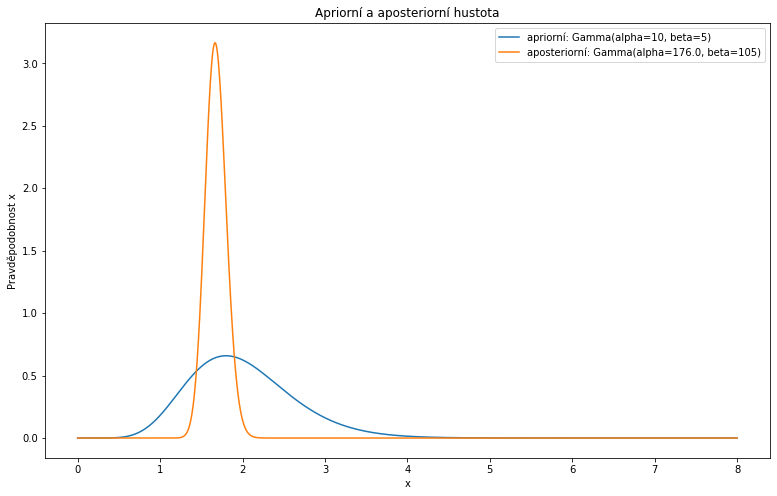

In [3]:
alpha_apriori = 10
beta_apriori = 5
plt.figure(figsize=(13, 8))
x = np.linspace(0, 8, 1000)
y_apriori = st.gamma.pdf(x, alpha_apriori, 0, 1/beta_apriori)
observations = np.array(df1["uloha_1 a)"].dropna().values)
alpha_aposteriori = alpha_apriori + observations.sum()
beta_aposteriori = beta_apriori + observations.shape[0]
y_aposteriori = st.gamma.pdf(x, alpha_aposteriori, 0, 1/beta_aposteriori)
plt.title("Apriorní a aposteriorní hustota")
plt.xlabel("x")
plt.ylabel("Pravděpodobnost x")
plt.plot(x, y_apriori, label=f"apriorní: Gamma(alpha={alpha_apriori}, beta={beta_apriori})")
plt.plot(x, y_aposteriori, label=f"aposteriorní: Gamma(alpha={alpha_aposteriori}, beta={beta_aposteriori})")
plt.legend()
plt.show()

### 2) Apriorní a aposteriorní prediktivní hustota pozorovaní
Apriorní i aposteriorní prediktivní hustota vychází z negativního binomického rozdělení a je dána vztahem:
$$
pmf(k) = \binom{k+r-1}{k}(1-p)^kp^r.
$$
Pro apriorní hustotu jsou parametry dány jako $r=\alpha$ a $p=\beta/(\beta+1)$, pro aposteriorní hustotu jsou parametry pak následující $r=\alpha + \sum^{n}_{i=1} x_i$ a $p=(\beta+n)/(\beta+n+1)$.

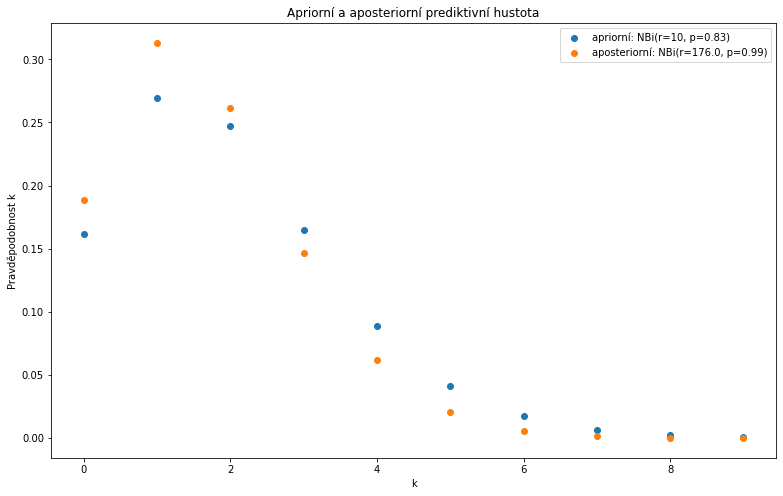

In [4]:
plt.figure(figsize=(13, 8))
k = np.linspace(0, 9, 10)
y_apriori = st.nbinom.pmf(k, alpha_apriori, beta_apriori/(beta_apriori+1))
y_aposteriori = st.nbinom.pmf(k, alpha_aposteriori, beta_aposteriori/(beta_aposteriori+1))
plt.title("Apriorní a aposteriorní prediktivní hustota")
plt.xlabel("k")
plt.ylabel("Pravděpodobnost k")
plt.scatter(k, y_apriori, label=f"apriorní: NBi(r={alpha_apriori}, p={round(beta_apriori/(beta_apriori+1), 2)})")
plt.scatter(k, y_aposteriori, label=f"aposteriorní: NBi(r={alpha_aposteriori}, p={round(beta_aposteriori/(beta_aposteriori+1), 2)})")
plt.legend()
plt.show()

### 3) Porovnání intervalů spolehlivosti odhadu $\lambda$ z apriorního a aposteriorního rozdělení
Bodový odhad parametru $\lambda$ je dán střední hodnotou Gamma rozdělení s odpovídajícími parametry. 95% interval spolehlivosti odhadu parametru $\lambda$ tak bude dán 
intervalem ohraničeným 2.5 a  97.5 percentily Gamma rozdělení s odpovídajícími parametry.

In [5]:
g_0025_apriori = st.gamma.ppf(0.025, alpha_apriori, 0, 1/beta_apriori)
g_0975_apriori = st.gamma.ppf(0.975, alpha_apriori, 0, 1/beta_apriori)
lambda_confidence_interval_apriori = (g_0025_apriori, g_0975_apriori)

observations = np.array(df1["uloha_1 a)"].dropna().values)
g_0025_aposteriori = st.gamma.ppf(0.025, alpha_aposteriori, 0, 1/beta_aposteriori)
g_0975_aposteriori = st.gamma.ppf(0.975, alpha_aposteriori, 0, 1/beta_aposteriori)
lambda_confidence_interval_aposteriori = (g_0025_aposteriori, g_0975_aposteriori)

print(f"Apriorní 95% interval spolehlivosti: <{round(lambda_confidence_interval_apriori[0], 3)}, {round(lambda_confidence_interval_apriori[1], 3)}>")
print(f"Aposteriorní 95% interval spolehlivosti: <{round(lambda_confidence_interval_aposteriori[0], 3)}, {round(lambda_confidence_interval_aposteriori[1], 3)}>")

Apriorní 95% interval spolehlivosti: <0.959, 3.417>
Aposteriorní 95% interval spolehlivosti: <1.438, 1.933>


Z výsledků lze pozorovat, že aposteriorní 95% interval spolehlivosti má menší rozsah než apriorní 95% interval spolehlivosti. Tzn., že na základě pozorování jsme schopni se stejnou spolehlivostí poměrně významně zpřesnit odhad parametru $\lambda$.

### 4) Výběr dvou aposteriorních bodových odhadů parametru $\lambda$
Prvně vybereme parametr $\lambda$ jako střední hodnotou aposteriorního Gamma rozdělení, tj. jeho Bayesovský bodový odhad:
$$
\lambda_1 \overset{odhad}{=} \frac{10 + 166}{5 + 100}=1.676
$$
Jako druhý bodový odhad parametru $\lambda$ zvolíme modus aposteriorního Gamma rozdělení:
$$\lambda_2 \overset{odhad}{=} \frac{10+166-1}{5+100} = 1.667$$ 

Pokud bychom následně prováděli další sady pozorování, v průměru bychom se měli blížit k odhadu parametru $\lambda = 1.676$ ($1.676$ připojení za 1 ms), nejčastěji však bude odhad $\lambda = 1.667$ ($1.667$ připojení za 1 ms) pro danou sadu. 

### 5) Výběr apriorního a aposteriorního bodového odhadu počtu pozorování


In [6]:
observations_apriori = alpha_apriori * (1 - beta_apriori / (beta_apriori + 1)) / (beta_apriori / (beta_apriori + 1))
observations_aposteriori = alpha_aposteriori * (1 - beta_aposteriori / (beta_aposteriori + 1)) / (beta_aposteriori / (beta_aposteriori + 1))

print(f"Apriorní očekávaný počet pozorování: {round(observations_apriori, 3)}")
print(f"Aposteriorní očekávaný počet pozorování: {round(observations_aposteriori, 3)}")

Apriorní očekávaný počet pozorování: 2.0
Aposteriorní očekávaný počet pozorování: 1.676


Jako oba výběry zvolíme střední hodnoty negativních binomických rozdělení s odpovídajícími parametry, tj.:
$$pocet\_pozorovani_{apriorni}=\frac{10 \cdot (1-0.83)}{0.83}=2.0$$
$$pocet\_pozorovani_{aposteriorni}=\frac{176 \cdot (1-0.99)}{0.99}=1.676$$

Z vybraných odhadů lze vidět, že pozorováním se poměrně významně posunul průměrný odhad počtu připojení za 1 ms z původního expertního odhadu. 

## b) Aproximace diskrétním rozdělením
Postup bude následující:  

1. Numericky zintegrujeme a normalizujeme funkci danou maximálními hodnotami *prior* měření pro každou skupinu, čímž dostaneme apriorní hustotu pravděpodobnosti rozdělení parametru $b$ $h(b)$, respektive pravděpodobnostní funkci rozdělení parametru $b$, protože numerickou integrací hustotu diskretizujeme. Diskretizaci provedeme na intervalu zdola ohraničeném minimem z maxim hodnot *prior* měření a shora maximem hodnot *prior* měření tak, že jej rovnoměrně rozdělíme na 60 podintervalů (experimentálně to vypadá jako dobrý kompromis pro zadaná data), které budeme mapovat na množinu diskrétních bodů (středy podintervalů) $B$. Mimo těchto 60 podintervalů bude hodnota apriorní pravděpodobnostní funkce rozdělení parametru $b$ rovna 0.  

2. Na vhodném diskretizovaném intervalu spočteme funkci věrohodnosti parametru $b$ $l(b)$ na základě *pozorování* a normalizujeme její hodnoty aplikováním funkce *Softmax*. Interval zdola ohraničíme maximem z hodnot *pozorování* a shora maximem z hodnot *prior* měření a funkci věrohodnosti tak budeme počítat pouze pro body z $B$, které náleží do tohoto intervalu, jinak její hodnota bude 0.  

3. Aposteriorní pravděpodobnostní funkce $P(b)$ je pak dána vztahem $P(b)=(l(b)h(b))/k$, kde $k$ je nějaká konstanta, kterou lze vypočítat jako $k=\sum_{b_i \in B}l(b_i)h(b_i)$ tím, že $l$ i $h$ jsou diskrétní funkce. Zřejmě hodnota aposteriorní pravděpodobnostní funkce bude různá od 0 pouze na intervalu definovaném v bodě 2.  

4. Apriorní pravděpodobnostní funkci, aposteriorní pravděpodobnostní funkci a funkci věrohodnosti interpolujeme zpět na spojité hustoty pomocí historgramů.

In [7]:
df_prior = df1[["uloha_1 b)_prior", "skupina"]]
df_prior = df_prior.groupby("skupina").agg(["max"])
prior_values = df_prior.values.flatten()

prior_hist_values, prior_hist_range = np.histogram(prior_values, bins=60)
prior_pmf = prior_hist_values / prior_hist_values.sum()
B_range = prior_hist_range[1:] + (prior_hist_range[1:] - prior_hist_range[:-1]) / 2

In [8]:
observations = df1["uloha_1 b)_pozorování"].dropna().values
observations_max = observations.max()
observations_argmax = np.argmax(B_range >= observations_max)
B_likelihood_range = B_range[observations_argmax:]

mean = 3
a = 1
scale = 1

log_likelihood_values = []
for b in B_likelihood_range:
    lower_bound = (a - mean)
    upper_bound = (b - mean)
    logpdf = st.truncnorm.logpdf(observations, lower_bound, upper_bound, loc=mean, scale=scale)
    log_likelihood_values.append(logpdf.sum())

likelihood = np.zeros(B_range.shape[0])
likelihood[observations_argmax:] = sp.softmax(log_likelihood_values)

In [9]:
posterior = prior_pmf * likelihood
posterior_pmf = posterior / posterior.sum()

### 1) Graf apriorní, aposteriorní hustotou a funkce věrohodnosti

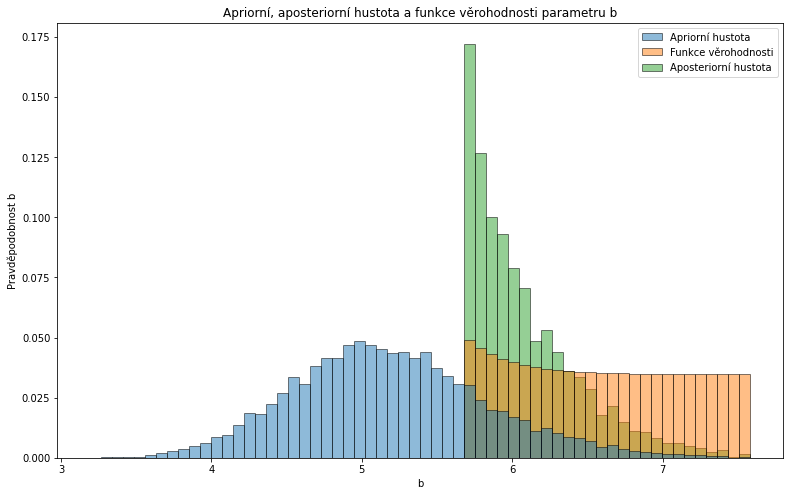

In [10]:
plt.figure(figsize=(13, 8))
plt.title("Apriorní, aposteriorní hustota a funkce věrohodnosti parametru b")
plt.xlabel("b")
plt.ylabel("Pravděpodobnost b")
plt.hist(B_range, bins=prior_hist_range, weights=prior_pmf, label="Apriorní hustota", alpha=0.5, edgecolor="black", zorder=3)
plt.hist(B_range, bins=prior_hist_range, weights=likelihood, label="Funkce věrohodnosti", alpha=0.5, edgecolor="black", zorder=2)
plt.hist(B_range, bins=prior_hist_range, weights=posterior_pmf, label="Aposteriorní hustota", alpha=0.5, edgecolor="black", zorder=1)
plt.legend()
plt.show()

### 2) 95% interval spolehlivosti parametru $b$
Granularita diskretizace je poměrně velká. To ale není vhodné pro odhady intervalů spolehlivosti, proto u již vypočtených hustot zjemníme několika řádově diskretizace, což nezmění její hodnoty pro dané úseky na ose x, ale interval spolehlivosti bude možné přesněji na osu x umístit.

In [11]:
factor = (B_range.shape[0] - 1) * 100

fine_posterior_pmf = []
for y in posterior_pmf:
    fine_posterior_pmf.extend([y / factor] * factor)
fine_posterior_pmf = np.array(fine_posterior_pmf)

fine_B_range = []
for i in range(1, B_range.shape[0]):
    fine_B_range.extend(np.linspace(B_range[i-1], B_range[i], int(factor * B_range.shape[0] / (B_range.shape[0] - 1))))
fine_B_range = np.array(fine_B_range)

Protože není blíže specifikováno jaký interval spolehlivosti máme počítat, spočteme oboustranný interval spolehlivosti. Spodní ohraničení intervalu tedy bude odpovídat 2.5 percentilu a horní ohraničení 97.5 percentilu aposteriorního rozdělení.

In [12]:
prob_sum = 0
i = observations_argmax * factor
while prob_sum + fine_posterior_pmf[i] < 0.025:
    prob_sum += fine_posterior_pmf[i]
    i += 1
lower_bound = fine_B_range[i]

while prob_sum + fine_posterior_pmf[i] <= 0.975:
    prob_sum += fine_posterior_pmf[i]
    i += 1
upper_bound = fine_B_range[i]

print(f"Aposteriorní 95% interval spolehlivosti parametru b: <{round(lower_bound, 3)}, {round(upper_bound, 3)}>")

Aposteriorní 95% interval spolehlivosti parametru b: <5.686, 7.033>


### 3) Bodové odhady parametru $b$
Jako bodové odhady si vybereme střední hodnotu a modus. Pro výpočet střední hodnoty opět využijeme diskrétních hodnot. Modus spočítáme jako $argmax$ z aposteriorní pravděpodobnostní funkce (diskretizované hustoty).

In [13]:
mean = B_range @ posterior_pmf
modus = fine_B_range[np.argmax(fine_posterior_pmf)]
print(f"Aposteriorní průměrná hodnota parametru b: {round(mean, 3)}")
print(f"Aposteriorní nejčastější hodnota parametru b: {round(modus, 3)}")

Aposteriorní průměrná hodnota parametru b: 6.086
Aposteriorní nejčastější hodnota parametru b: 5.675


# ÚLOHA 2 – Regrese

## 1) Určení vhodného regresního modelu
Máme k dispozici data o 5 proměnných, z nichž proměnná $y=Ping$ je cílová hodnota a proměnné $X=(OSType, ActiveUsers, InteractingPct, ScrollingPct)^T$ jsou prediktory cílové hodnoty.

### a) Výchozí plný kvadratický model
$Ping = \beta_1 + \beta_2 \cdot OSType + \beta_3 \cdot ActiveUsers + \beta_4 \cdot InteractingPct + \beta_5 \cdot ScrollingPct + \beta_6 \cdot OSType \cdot ActiveUsers + \beta_7 \cdot OSType \cdot InteractingPct + \beta_8 \cdot OSType \cdot ScrollingPct + \beta_9 \cdot ActiveUsers \cdot InteractingPct + \beta_{10} \cdot ActiveUsers \cdot ScrollingPct + \beta_{11} \cdot InteractingPct \cdot ScrollingPct + \beta_{12} \cdot OSType^2 + \beta_{13} \cdot ActiveUsers^2 + \beta_{14} \cdot InteractingPct^2 + \beta_{15} \cdot ScrollingPct^2 + \epsilon$, kde $\epsilon$ je chyba způsobená šumem ve vstupních datech. V následujících rovnicích tuto chybu již pro jednoduchost nebudeme ale uvádět.

Dále budeme muset při regresi zakódovat hodnoty nečíselné proměnné $OSType$. Tato proměnná je kategoriální nominální, takže vhodné je použít tzv. *one-hot encoding*. Data obsahují 4 kategorie, tzn., že počet prediktorů vzroste o 3 a s tím se i dramaticky rozšíří tvar funkce plného kvadratického modelu, kterou již z tohoto důvodu nebudeme uvádět. Nic méně funkci lze vyčíst z kódu v následujících buňkách. Explicitní kódování provedeme z důvodu lepší názornosti oproti použití $C(OSType)$ při definici jeho formule a při odstraňování lineárních závislostí. Také provedeme přejmenování sloupce `Ping [ms]` na `Ping` pro jednoduší práci s daty.

In [14]:
df2_one_hot = pd.get_dummies(df2["OSType"]).join(df2.drop("OSType", axis=1))
df2_one_hot.rename(columns={"Ping [ms]": "Ping"}, inplace=True)
df2_one_hot

,Android,MacOS,Windows,iOS,ActiveUsers,InteractingPct,ScrollingPct,Ping
0,0,0,0,1,4113,0.8283,0.1717,47
1,0,0,0,1,7549,0.3461,0.6539,46
2,0,0,1,0,8855,0.2178,0.7822,55
3,1,0,0,0,8870,0.0794,0.9206,56
4,0,1,0,0,9559,0.7282,0.2718,76
...,...,...,...,...,...,...,...,...
497,0,0,0,1,5315,0.1974,0.8026,28
498,0,1,0,0,1392,0.2373,0.7627,24
499,0,0,0,1,6014,0.8112,0.1888,54
500,1,0,0,0,5118,0.2345,0.7655,39


In [15]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + iOS + ActiveUsers + InteractingPct + ScrollingPct + " +
            "Android : ActiveUsers + Android : InteractingPct + Android : ScrollingPct + " +
            "MacOS : ActiveUsers + MacOS : InteractingPct + MacOS : ScrollingPct + " +
            "Windows : ActiveUsers + Windows : InteractingPct + Windows : ScrollingPct + " +
            "iOS : ActiveUsers + iOS : InteractingPct + iOS : ScrollingPct + " + 
            "ActiveUsers : InteractingPct + ActiveUsers : ScrollingPct + " +
            "InteractingPct : ScrollingPct + " + 
            "I(Android**2) + I(MacOS**2) + I(Windows**2) + I(iOS**2) + I(ActiveUsers**2) + I(InteractingPct**2) + I(ScrollingPct**2)",
    data=df2_one_hot
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     187.9
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          5.18e-186
Time:                        13:43:13   Log-Likelihood:                -1598.4
No. Observations:                 502   AIC:                             3227.
Df Residuals:                     487   BIC:                             3290.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       8.8705      0.594     14.938      0.000       7.704      10.037
Android                         1.2237      0.522      2.344      0.019       0.198       2.249
MacOS                           1.9531      0.451      4.331      0.000       1.067       2.839
Windows                         4.4358      0.449      9.882      0.000       3.554       5.318
iOS                             1.2579      0.451      2.792      0.005       0.373       2.143
ActiveUsers                     0.0048      0.000     16.935      0.000       0.004       0.005
InteractingPct                 11.9830      0.584     20.521      0.000      10.836      13.130
ScrollingPct                   -3.1125      0.544     -5.726      0.000      -4.180      -2.045
Android:ActiveUsers             0.0013      0.000      6.076      0.000       0.001       0.002
Android:InteractingPct          2.4566      0.912      2.693      0.007       0.664       4.249
Android:ScrollingPct           -1.2329      0.877     -1.406      0.160      -2.956       0.490
MacOS:ActiveUsers               0.0027      0.000     14.431      0.000       0.002       0.003
MacOS:InteractingPct            2.6430      0.758      3.487      0.001       1.154       4.132
MacOS:ScrollingPct             -0.6900      0.771     -0.895      0.371      -2.204       0.824
Windows:ActiveUsers             0.0005      0.000      2.835      0.005       0.000       0.001
Windows:InteractingPct          4.2757      0.873      4.899      0.000       2.561       5.991
Windows:ScrollingPct            0.1601      0.824      0.194      0.846      -1.460       1.780
iOS:ActiveUsers                 0.0002      0.000      1.268      0.205      -0.000       0.001
iOS:InteractingPct              2.6076      0.839      3.107      0.002       0.959       4.257
iOS:ScrollingPct               -1.3497      0.809     -1.669      0.096      -2.938       0.239
ActiveUsers:InteractingPct      0.0008      0.000      3.608      0.000       0.000       0.001
ActiveUsers:ScrollingPct        0.0039      0.000     17.624      0.000       0.003       0.004
InteractingPct:ScrollingPct     4.1987      1.263      3.325      0.001       1.717       6.680
I(Android ** 2)                 1.2237      0.522      2.344      0.019       0.198       2.249
I(MacOS ** 2)                   1.9531      0.451      4.331      0.000       1.067       2.839
I(Windows ** 2)                 4.4358      0.449      9.882      0.000       3.554       5.318
I(iOS ** 2)                     1.2579      0.451      2.792      0.005       0.373       2.143
I(ActiveUsers ** 2)          -4.17e-07    4.4e-08     -9.469      0.000   -5.03e-07    -3.3e-07
I(InteractingPct ** 2)          7.7842      1.230      6.331      0.000       5.368      10.200
I(Scrolling

### b) Diskuze splnění předpokladů lineární regrese
Již ze zadání je zřejmé, že prediktory $InteractingPct$ a $ScrollingPct$ jsou lineárně závislé. Závislost lze vyjádřit vztahem $ScrollingPct = 1 - InteractingPct$. Další lineární závislost je mezi prediktory $Android$, $MacOS$, $Windows$ a $iOS$, které vznikly za pomocí *one-hot encoding* z prediktoru $OSType$. Závislost mezi těmito prediktory lze vyjádřit vztahem $iOS = 1 - Android - MacOS - Windows$. Nakonec z důvodu *one-hot encoding* budou vždy lineárně závislé i dvojice $Android$ a $Android^2$, $MacOS$ a $MacOS^2$ atd. z toho důvodu, že hodnoty 0 a 1 jsou pevnými body funkce $f(x)=x^2$. (Závislosti jsou uváděny pro lepší představu na datech před standardizací. Standardizace jakožto lineární transformace přímé linearní závislosti neporuší.)

Determinant matice plánu by tedy měl být nulový a regresní koeficienty by nemělo být možné odhadnout. Ačkoliv dostaneme při odhadu modelu varovnou hlášku, podaří se nám vlivem numerických chyb regresní koeficienty odhadnout. Tento model není ale vhodný, protože lineární závislost prediktorů vede na nestabilní odhady regresních koeficientů a takovéto modely jsou často senzitivní na malé změny v datech.

Řešením je odstranit jeden prediktor z každé instance lineárně závislých prediktorů, v tomto případě např. $ScrollingPct$, $iOS$ a poté druhé mocniny zakódovaných prediktorů.

In [16]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android : ActiveUsers + Android : InteractingPct + " +
            "MacOS : ActiveUsers + MacOS : InteractingPct + " +
            "Windows : ActiveUsers + Windows : InteractingPct + " +
            "ActiveUsers : InteractingPct + " +
            "I(ActiveUsers**2) + I(InteractingPct**2)",
    data=df2_one_hot
)
results = model.fit()
df = pd.read_html(results.summary().tables[2].as_html(), header=None, index_col=None)[0]
df.columns = [" "] + [""] * (len(df.columns) -1)
df.set_index(" ", inplace=True)
df

,,,
,,,
Omnibus:,228.442,Durbin-Watson:,1.933000e+00
Prob(Omnibus):,0.000,Jarque-Bera (JB):,3.152488e+03
Skew:,1.603,Prob(JB):,0.000000e+00
Kurtosis:,14.851,Cond. No.,9.500000e+08


Na základě hodnoty čísla podmíněnosti se v datech pořád nachází silná lineární závislost. Lineární závislost je pravděpodobně způsobena druhými mocninami a součiny (interakce druhého řádu), které se výrazně neliší pro malé hodnoty od hodnot původních. Tuto teorii ověříme pomocí VIF.

In [17]:
df_formula = pd.DataFrame(model.exog, columns=model.exog_names)
vif_df = pd.DataFrame([smso.variance_inflation_factor(df_formula.values, i) for i in range(df_formula.shape[1])], index=df_formula.columns, columns=["VIF"])
vif_df

,VIF
Intercept,53.792987
Android,12.690813
MacOS,12.674754
Windows,11.876880
ActiveUsers,26.240008
InteractingPct,22.559436
Android:ActiveUsers,10.021529
Android:InteractingPct,6.107464
MacOS:ActiveUsers,9.485078
MacOS:InteractingPct,7.060919


Teorie se potvrzuje, velké množství hodnot VIF je větší než 10, což indikuje velkou míru multikolinearity. Tu jednoduše odstraníme standardizací do rozsahu $\langle-1, 1 \rangle$. Samozřejmě je nutné si uložit hodnoty, kterými jsou data standardizována, a následně stejným způsobem standardizovat i dosud neviděné hodnoty při predikci odhadnutým modelem a na výsledek predikce aplikovat inverzi standardizace. (Standardizovat cílovou hodnotu ($Ping$) není nutné, ale obecně je ve strojovém učení lepší, pokud vstupy a výstupy modelu mají stejný řád, velký rozdíl v řádech může vést na numerické nestability. Další výhodou standardizace do rozsahu -1, 1 je, že v tomto rozsahu se nachází polovina reprezentovatelných hodnot datových typů s plovoucí řádovou čárkou, což pak umožňuje přesnější výpočty.)

In [18]:
df2_one_hot = df2_one_hot.astype(float)
mins = df2_one_hot.min(axis=0)
maxes = df2_one_hot.max(axis=0)
df2_one_hot_standardized = (df2_one_hot - mins) / (maxes - mins) * 2 - 1

df2_one_hot_standardized

,Android,MacOS,Windows,iOS,ActiveUsers,InteractingPct,ScrollingPct,Ping
0,-1.0,-1.0,-1.0,1.0,-0.191837,0.658752,-0.658752,-0.088608
1,-1.0,-1.0,-1.0,1.0,0.509388,-0.307484,0.307484,-0.113924
2,-1.0,-1.0,1.0,-1.0,0.775918,-0.564573,0.564573,0.113924
3,1.0,-1.0,-1.0,-1.0,0.778980,-0.841900,0.841900,0.139241
4,-1.0,1.0,-1.0,-1.0,0.919592,0.458171,-0.458171,0.645570
...,...,...,...,...,...,...,...,...
497,-1.0,-1.0,-1.0,1.0,0.053469,-0.605450,0.605450,-0.569620
498,-1.0,1.0,-1.0,-1.0,-0.747143,-0.525498,0.525498,-0.670886
499,-1.0,-1.0,-1.0,1.0,0.196122,0.624487,-0.624487,0.088608
500,1.0,-1.0,-1.0,-1.0,0.013265,-0.531109,0.531109,-0.291139


In [19]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android : ActiveUsers + Android : InteractingPct + " +
            "MacOS : ActiveUsers + MacOS : InteractingPct + " +
            "Windows : ActiveUsers + Windows : InteractingPct + " +
            "ActiveUsers : InteractingPct + " +
            "I(ActiveUsers**2) + I(InteractingPct**2)",
    data=df2_one_hot_standardized
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     187.9
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          5.18e-186
Time:                        13:43:13   Log-Likelihood:                 247.09
No. Observations:                 502   AIC:                            -464.2
Df Residuals:                     487   BIC:                            -400.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.2126      0.017     12.499      0.000       0.179       0.246
Android                        0.0666      0.010      6.515      0.000       0.047       0.087
MacOS                          0.1791      0.010     18.701      0.000       0.160       0.198
Windows                        0.1195      0.010     12.379      0.000       0.101       0.139
ActiveUsers                    0.6346      0.027     23.612      0.000       0.582       0.687
InteractingPct                 0.2298      0.023      9.860      0.000       0.184       0.276
Android:ActiveUsers            0.0656      0.019      3.369      0.001       0.027       0.104
Android:InteractingPct        -0.0017      0.017     -0.100      0.921      -0.035       0.032
MacOS:ActiveUsers              0.1523      0.018      8.370      0.000       0.117       0.188
MacOS:InteractingPct          -0.0039      0.015     -0.256      0.798      -0.034       0.026
Windows:ActiveUsers            0.0184      0.018      1.021      0.308      -0.017       0.054
Windows:InteractingPct         0.0010      0.017      0.060      0.952      -0.032       0.034
ActiveUsers:InteractingPct    -0.1911      0.022     -8.532      0.000      -0.235      -0.147
I(ActiveUsers ** 2)           -0.2535      0.027     -9.469      0.000      -0.306      -0.201
I(InteractingPct ** 2)        -0.0235      0.022     -1.067      0.287      -0.067       0.020
==============================================================================
Omnibus:                      228.442   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3152.488
Skew:                           1.603   Prob(JB):                         0.00
Kurtosis:                      14.851   Cond. No.                         7.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Po odstranění všech přímých lineárních závislostí a i nepřímých standardizací lze pozorovat, že schopnost modelu vystihnout vstupní data se dle koeficientu determinace nezměnila. Změnilo se ale číslo podmíněnosti, které nyní již indikuje, zě matice plánu je dobře podmíněná a dává na základě ní smysl odhadovat koeficienty modelu.  

Dle F-statistiky existuje alespoň jeden nenulový koeficient kromě konstanty. Nic méně dle t-statistik jednotlivých parametrů u několika parametrů nezamítáme, že jsou různé od 0. Budeme tedy postupně eliminovat nejsložitější koeficienty, tj. prvně koeficient pro $InteractingPct^2$.

In [20]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android : ActiveUsers + Android : InteractingPct + " +
            "MacOS : ActiveUsers + MacOS : InteractingPct + " +
            "Windows : ActiveUsers + Windows : InteractingPct + " +
            "ActiveUsers : InteractingPct + " +
            "I(ActiveUsers**2)",
    data=df2_one_hot_standardized
)
results = model.fit()
pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2045,0.015,13.409,0.000,0.175,0.234
Android,0.0670,0.010,6.561,0.000,0.047,0.087
MacOS,0.1786,0.010,18.670,0.000,0.160,0.197
Windows,0.1203,0.010,12.485,0.000,0.101,0.139
ActiveUsers,0.6339,0.027,23.591,0.000,0.581,0.687
InteractingPct,0.2291,0.023,9.834,0.000,0.183,0.275
Android:ActiveUsers,0.0641,0.019,3.297,0.001,0.026,0.102
Android:InteractingPct,-0.0025,0.017,-0.147,0.883,-0.036,0.031
MacOS:ActiveUsers,0.1520,0.018,8.353,0.000,0.116,0.188
MacOS:InteractingPct,-0.0048,0.015,-0.310,0.756,-0.035,0.025


Dále odebereme koeficient pro $Windows \cdot InteractingPct$.

In [21]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android : ActiveUsers + Android : InteractingPct + " +
            "MacOS : ActiveUsers + MacOS : InteractingPct + " +
            "Windows : ActiveUsers + " +
            "ActiveUsers : InteractingPct + " +
            "I(ActiveUsers**2)",
    data=df2_one_hot_standardized
)
results = model.fit()
pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2045,0.015,13.466,0.000,0.175,0.234
Android,0.0670,0.010,6.581,0.000,0.047,0.087
MacOS,0.1786,0.010,18.737,0.000,0.160,0.197
Windows,0.1202,0.010,12.584,0.000,0.101,0.139
ActiveUsers,0.6340,0.027,23.632,0.000,0.581,0.687
InteractingPct,0.2285,0.016,14.149,0.000,0.197,0.260
Android:ActiveUsers,0.0641,0.019,3.301,0.001,0.026,0.102
Android:InteractingPct,-0.0028,0.015,-0.188,0.851,-0.032,0.026
MacOS:ActiveUsers,0.1520,0.018,8.362,0.000,0.116,0.188
MacOS:InteractingPct,-0.0051,0.013,-0.388,0.699,-0.031,0.021


Následně odebereme koeficient pro $Windows \cdot ActiveUsers$.

In [22]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android : ActiveUsers + Android : InteractingPct + " +
            "MacOS : ActiveUsers + MacOS : InteractingPct + " +
            "ActiveUsers : InteractingPct + " +
            "I(ActiveUsers**2)",
    data=df2_one_hot_standardized
)
results = model.fit()
pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2050,0.015,13.511,0.000,0.175,0.235
Android,0.0673,0.010,6.610,0.000,0.047,0.087
MacOS,0.1789,0.010,18.772,0.000,0.160,0.198
Windows,0.1212,0.010,12.761,0.000,0.103,0.140
ActiveUsers,0.6155,0.020,31.387,0.000,0.577,0.654
InteractingPct,0.2284,0.016,14.141,0.000,0.197,0.260
Android:ActiveUsers,0.0544,0.017,3.227,0.001,0.021,0.087
Android:InteractingPct,-0.0033,0.015,-0.221,0.825,-0.033,0.026
MacOS:ActiveUsers,0.1423,0.015,9.219,0.000,0.112,0.173
MacOS:InteractingPct,-0.0055,0.013,-0.419,0.675,-0.031,0.020


Budeme pokračovat s odebráním koeficientu pro $MacOS \cdot InteractingPct$.

In [23]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android : ActiveUsers + Android : InteractingPct + " +
            "MacOS : ActiveUsers + " +
            "ActiveUsers : InteractingPct + " +
            "I(ActiveUsers**2)",
    data=df2_one_hot_standardized
)
results = model.fit()
pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2050,0.015,13.519,0.000,0.175,0.235
Android,0.0675,0.010,6.643,0.000,0.048,0.087
MacOS,0.1789,0.010,18.787,0.000,0.160,0.198
Windows,0.1213,0.009,12.787,0.000,0.103,0.140
ActiveUsers,0.6156,0.020,31.420,0.000,0.577,0.654
InteractingPct,0.2317,0.014,16.507,0.000,0.204,0.259
Android:ActiveUsers,0.0542,0.017,3.222,0.001,0.021,0.087
Android:InteractingPct,-0.0011,0.014,-0.077,0.939,-0.028,0.026
MacOS:ActiveUsers,0.1423,0.015,9.223,0.000,0.112,0.173
ActiveUsers:InteractingPct,-0.1900,0.022,-8.530,0.000,-0.234,-0.146


Pokračujme s odebráním koeficientu pro $Android \cdot InteractingPct$.

In [24]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android : ActiveUsers + " +
            "MacOS : ActiveUsers + " +
            "ActiveUsers : InteractingPct + " +
            "I(ActiveUsers**2)",
    data=df2_one_hot_standardized
)
results = model.fit()
pd.read_html(results.summary().tables[1].as_html(), header=0, index_col=0)[0]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2050,0.015,13.557,0.000,0.175,0.235
Android,0.0675,0.010,6.673,0.000,0.048,0.087
MacOS,0.1789,0.010,18.829,0.000,0.160,0.198
Windows,0.1214,0.009,12.804,0.000,0.103,0.140
ActiveUsers,0.6155,0.020,31.467,0.000,0.577,0.654
InteractingPct,0.2323,0.011,20.285,0.000,0.210,0.255
Android:ActiveUsers,0.0542,0.017,3.225,0.001,0.021,0.087
MacOS:ActiveUsers,0.1423,0.015,9.232,0.000,0.112,0.173
ActiveUsers:InteractingPct,-0.1903,0.022,-8.621,0.000,-0.234,-0.147
I(ActiveUsers ** 2),-0.2511,0.027,-9.432,0.000,-0.303,-0.199


Nyní již u žádného koeficientu nemůžeme zamítnout, že by byl různý od 0, jinak řečeno, že je 0. Dle koeficientu determinace odebraní výše popsaných regresních koeficientů na prakticky žádnou změnu ve schopnosti modelu predikovat. Model jsme ale zjednodušili a obecně platí, že jednodušší modely jsou schopné lépe generalizovat, tzn., lépe predikovat z dosud neviděných prediktorů.

Dle Omnibus testu a Jarque-Bera testu lze říci, že rezidua se neřídí normálním rozdělením. Ideálně by měly být hodnoty těchto testů malé a p-hodnoty odpovídajících statistických testů blízko 1. Stejně tak nenormalitu reziduí indikuje vysoká hodnota Skew, rezidua jsou umístěna asymetricky kolem střední hodnoty. A i hodnota Kurtosis indikuje nenormalitu rezidují, u normálního rozdělení by mělo platit, že $Kurtosis=3$. Nakonec alespoň statistika Durbin-Watson dosahuje požadované hodnoty, tj. blízko 2, a říká nám, že po sobě jdoucí rezidua mají minimální pozitivní autokorelaci, tzn., že rezidua nejsou prakticky autokorelovaná.

Výsledky testů na normalitu reziduí mohou vycházet špatně kvůli výskytu odlehlých a vlivných bodů, které významně posunou hyper-rovinu tak, že většina reziduí se bude nacházet v jedné části podprostoru, který tato hyper-rovina dělí. Odstraněním odlehlých a vlivných bodů, pokud to bude dávat smysl, bychom tento problém měli eliminovat.

In [25]:
influence = results.get_influence()
df_with_stats = pd.DataFrame({
    "Leverage": influence.hat_matrix_diag,
    "Standardized Residuals": influence.resid_studentized_internal,
    "Studentized Residuals": influence.resid_studentized_external,
    "Cook's Distance": influence.cooks_distance[0],
    "Cook's Distance_p-value": influence.cooks_distance[1]
}, index=df2_one_hot_standardized.index).join(df2_one_hot_standardized)

df_with_stats = df_with_stats[
    (df_with_stats["Leverage"] > 3 * len(results.params) / df2_one_hot_standardized.shape[0]) |
    (np.abs(df_with_stats["Standardized Residuals"]) > 2) |
    (df_with_stats["Cook's Distance_p-value"] < 0.05)
]
df_with_stats

,Leverage,Standardized Residuals,Studentized Residuals,Cook's Distance,Cook's Distance_p-value,Android,MacOS,Windows,iOS,ActiveUsers,InteractingPct,ScrollingPct,Ping
62,0.012588,-2.035486,-2.042033,0.005282,1.000000,-1.0,1.0,-1.0,-1.0,-0.315510,-0.128344,0.128344,-0.392405
82,0.009960,2.671229,2.688077,0.007179,1.000000,-1.0,-1.0,1.0,-1.0,-0.169592,-0.027552,0.027552,0.392405
114,0.012944,2.114490,2.122004,0.005863,1.000000,-1.0,1.0,-1.0,-1.0,-0.136531,-0.553953,0.553953,0.265823
129,0.013860,-2.121105,-2.128704,0.006323,1.000000,-1.0,-1.0,1.0,-1.0,0.206531,-0.812243,0.812243,-0.316456
145,0.023779,-2.291405,-2.301388,0.012789,1.000000,1.0,-1.0,-1.0,-1.0,-0.333061,0.772768,-0.772768,-0.341772
254,0.011451,2.006018,2.012224,0.004661,1.000000,-1.0,-1.0,-1.0,1.0,0.094082,0.196073,-0.196073,0.215190
255,0.009970,5.949133,6.169114,0.035643,0.999999,-1.0,-1.0,1.0,-1.0,0.093878,-0.016732,0.016732,1.000000
298,0.062002,-0.426332,-0.425977,0.001201,1.000000,1.0,-1.0,-1.0,-1.0,0.970204,-0.976355,0.976355,0.139241
310,0.016032,-2.084734,-2.091874,0.007081,1.000000,-1.0,-1.0,1.0,-1.0,0.325714,0.926661,-0.926661,0.037975
332,0.030074,2.124119,2.131756,0.013990,1.000000,1.0,-1.0,-1.0,-1.0,-0.503061,0.556357,-0.556357,0.139241


Zejména problematické se jeví hodnoty na řádcích 255 a 476, zobrazíme si je ještě i v původních datech před standardizací v porovnání s nejbližšími hodnotami, abychom mohli lépe rozhodnout, jestli je je vhodné z dat vyřadit.

In [26]:
df2_one_hot.sort_values("Ping", ascending=False).head(10)

,Android,MacOS,Windows,iOS,ActiveUsers,InteractingPct,ScrollingPct,Ping
255,0.0,0.0,1.0,0.0,5513.0,0.4912,0.5088,90.0
466,0.0,1.0,0.0,0.0,8073.0,0.8253,0.1747,84.0
259,0.0,1.0,0.0,0.0,9516.0,0.6716,0.3284,84.0
37,0.0,1.0,0.0,0.0,7454.0,0.9064,0.0936,83.0
60,0.0,1.0,0.0,0.0,8956.0,0.9946,0.0054,82.0
163,0.0,1.0,0.0,0.0,9615.0,0.7166,0.2834,82.0
55,0.0,1.0,0.0,0.0,7957.0,0.7851,0.2149,82.0
364,0.0,1.0,0.0,0.0,8125.0,0.7244,0.2756,79.0
195,0.0,1.0,0.0,0.0,9714.0,0.0555,0.9445,78.0
417,0.0,1.0,0.0,0.0,9510.0,0.4712,0.5288,78.0


In [27]:
df2_one_hot.sort_values("ActiveUsers").head(10)

,Android,MacOS,Windows,iOS,ActiveUsers,InteractingPct,ScrollingPct,Ping
476,0.0,1.0,0.0,0.0,153.0,0.2111,0.7889,61.0
354,0.0,0.0,1.0,0.0,1021.0,0.2744,0.7256,24.0
85,0.0,0.0,0.0,1.0,1036.0,0.2179,0.7821,11.0
273,0.0,1.0,0.0,0.0,1068.0,0.8624,0.1376,34.0
249,0.0,0.0,0.0,1.0,1117.0,0.2920,0.7080,18.0
474,0.0,1.0,0.0,0.0,1118.0,0.4899,0.5101,30.0
316,0.0,0.0,0.0,1.0,1128.0,0.1030,0.8970,16.0
127,0.0,0.0,1.0,0.0,1174.0,0.7406,0.2594,48.0
64,0.0,0.0,0.0,1.0,1188.0,0.1077,0.8923,15.0
32,0.0,0.0,1.0,0.0,1193.0,0.0300,0.9700,19.0


I po takto nedůkladné analýze lze pozorovat, že počet aktivních uživatelů je poměrně významně pozitivně korelovaný s pingem (porovnáním hodnot v 1. a 2. tabulce). U identifikovaných problematických hodnot ale tato korelace neodpovídá a body se jeví jako odlehlé. V obou případech dále obhájíme odstranění řádku tím, že latence přenosů dat po internetu je proměnlivá a např. při poruše některého ze síťových prvků může být významně horší (případ řádku 255) a nebo porucha může i znemožňovat připojení většině uživatelům (případ řádku 476). My ale chceme naším modelem predikovat normální chování, proto nemá smysl hodnoty zahrnovat při jeho odhadování. 

V následujících buňkách identifikované řádky odstraníme, data znovu standardizujeme, znovu odhadneme parametry posledního testovaného modelu a porovnáme jeho diagnostiky s jeho předešlým odhadem.

In [28]:
df2_dropped = df2_one_hot.loc[[255, 476]]
df2_one_hot.drop([255, 476], axis=0, inplace=True)

mins = df2_one_hot.min(axis=0)
maxes = df2_one_hot.max(axis=0)
df2_one_hot_standardized = (df2_one_hot - mins) / (maxes - mins) * 2 - 1

df2_one_hot_standardized

,Android,MacOS,Windows,iOS,ActiveUsers,InteractingPct,ScrollingPct,Ping
0,-1.0,-1.0,-1.0,1.0,-0.307658,0.658752,-0.658752,-0.013699
1,-1.0,-1.0,-1.0,1.0,0.461711,-0.307484,0.307484,-0.041096
2,-1.0,-1.0,1.0,-1.0,0.754142,-0.564573,0.564573,0.205479
3,1.0,-1.0,-1.0,-1.0,0.757501,-0.841900,0.841900,0.232877
4,-1.0,1.0,-1.0,-1.0,0.911778,0.458171,-0.458171,0.780822
...,...,...,...,...,...,...,...,...
497,-1.0,-1.0,-1.0,1.0,-0.038513,-0.605450,0.605450,-0.534247
498,-1.0,1.0,-1.0,-1.0,-0.916928,-0.525498,0.525498,-0.643836
499,-1.0,-1.0,-1.0,1.0,0.118003,0.624487,-0.624487,0.178082
500,1.0,-1.0,-1.0,-1.0,-0.082624,-0.531109,0.531109,-0.232877


In [29]:
model = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android : ActiveUsers + " +
            "MacOS : ActiveUsers + " +
            "ActiveUsers : InteractingPct + " +
            "I(ActiveUsers**2)",
    data=df2_one_hot_standardized
)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Ping   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     388.1
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          1.43e-216
Time:                        13:43:14   Log-Likelihood:                 269.14
No. Observations:                 500   AIC:                            -518.3
Df Residuals:                     490   BIC:                            -476.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3600      0.014     25.018      0.000       0.332       0.388
Android                        0.0777      0.009      8.205      0.000       0.059       0.096
MacOS                          0.2011      0.009     22.300      0.000       0.183       0.219
Windows                        0.1279      0.009     14.140      0.000       0.110       0.146
ActiveUsers                    0.5840      0.017     35.312      0.000       0.551       0.616
InteractingPct                 0.2379      0.011     21.964      0.000       0.217       0.259
Android:ActiveUsers            0.0551      0.015      3.777      0.000       0.026       0.084
MacOS:ActiveUsers              0.1616      0.014     11.929      0.000       0.135       0.188
ActiveUsers:InteractingPct    -0.2059      0.019    -10.693      0.000      -0.244      -0.168
I(ActiveUsers ** 2)           -0.2511      0.021    -11.764      0.000      -0.293      -0.209
==============================================================================
Omnibus:                        0.799   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.671   Jarque-Bera (JB):                0.865
Skew:                           0.002   Prob(JB):                        0.649
Kurtosis:                       2.796   Cond. No.                         5.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Všechny koeficienty modelu zůstaly i na dále významné. Dle očekávání se výrazně zlepšily jeho diagnostiky. Nyní již žádná diagnostika není významně proti normalitě reziduí, což potvrzuje i Q-Q graf, viz níže. První předpoklad pro lineární regresi, normalita reziduí, je tedy splněn. 

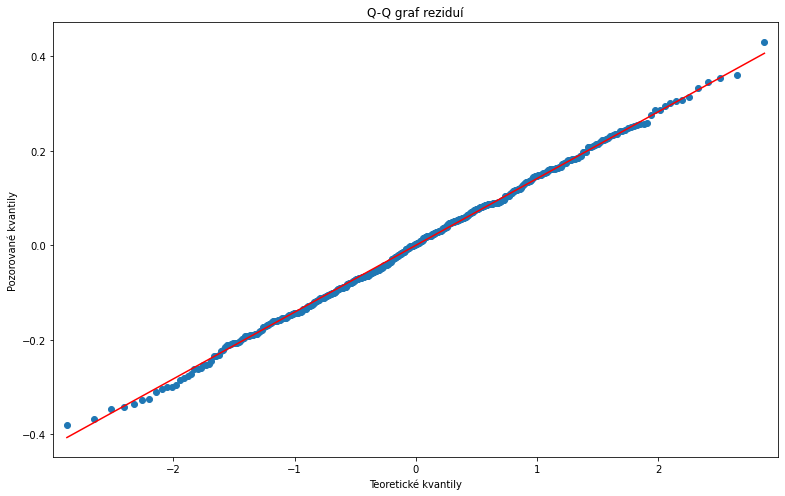

In [30]:
fig, ax = plt.subplots(figsize=(13, 8))
splt.qqplot(results.resid, line="s", ax=ax)
plt.xlabel("Teoretické kvantily")
plt.ylabel("Pozorované kvantily")
plt.title("Q-Q graf reziduí")
plt.show()

Homoskedasticitu, druhý předpoklad pro lineární regresi, můžeme do jisté míry ověřit grafem rozptylu reziduí vzhledem k predikovaným hodnotám.

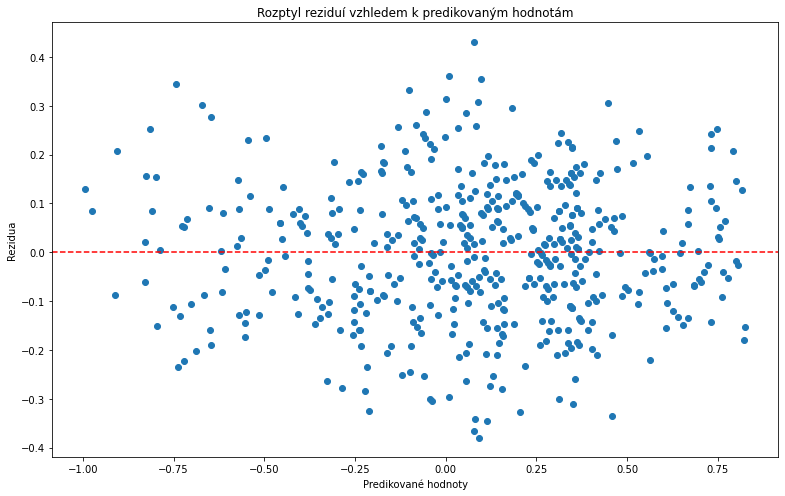

In [31]:
plt.figure(figsize=(13, 8))
plt.scatter(results.fittedvalues, results.resid)
plt.title("Rozptyl reziduí vzhledem k predikovaným hodnotám")
plt.xlabel("Predikované hodnoty")
plt.ylabel("Rezidua")
plt.axhline(y=0, color="red", linestyle="--")
plt.show()

Lze pozorovat, že rozptyl reziduí je zhruba rovnoměrný kolem osy x až na malou výchylku zhruba kolem hodnot -0.4 a 0.1, takže i původní data by měla mít zhruba rovnoměrný rozptyl. Tím pádem i druhý předpoklad lineární regrese můžeme nyní považovat za splněný. 

Dále můžeme pozorovat poměrně významné zlepšení koeficientu determinace z 0.843 na 0.877. Tento model tedy bude náš finální, dán rovnicí $Ping = \beta_0 + \beta_1 \cdot Android + \beta_2 \cdot MacOS + \beta_3 \cdot Windows + \beta_4 \cdot ActiveUsers + \beta_5 \cdot InteractingPct + \beta_6 \cdot Android \cdot ActiveUsers + \beta_7 \cdot MacOS \cdot ActiveUsers + \beta_8 \cdot ActiveUsers \cdot InteractingPct + \beta_9 \cdot ActiveUsers^2$.

Pokud dosadíme za $\beta_i$ odhadnuté koeficienty lze model zapsat následovně $Ping = [0.3600, 0.0777, 0.2011, 0.1279, 0.5840, 0.2379, 0.0551, 0.1616, -0.2059, -0.2511] \times [1, Android, MacOS, Windows, ActiveUsers, InteractingPct, Android \cdot ActiveUsers, MacOS \cdot ActiveUsers, ActiveUsers \cdot InteractingPct, ActiveUsers^2]^T$. Výpočet touto rovnicí budeme pak několikrát provádět níže.

## 2) Identifikace parametrů s nejproblematičtější hodnotou odezvy
Jako parametry považujeme vstupní hodnoty modelu (ve strojovém učení se pojem parametr, např. počet vrstev modelu, aktivační funkce, optimalizátor, ..., používá spíše ve smyslu koeficientu zde u regrese, najít ale problematické koeficienty by bylo triviální).

Problematické parametry jistě budou takové, pro které bude odhad ping záporný, tzn. nereálný. Stačí se tedy zaměřit na nerovnici $0 > [0.3600, 0.0777, 0.2011, 0.1279, 0.5840, 0.2379, 0.0551, 0.1616, -0.2059, -0.2511] \times [1, Android, MacOS, Windows, ActiveUsers, InteractingPct, Android \cdot ActiveUsers, MacOS \cdot ActiveUsers, ActiveUsers \cdot InteractingPct, ActiveUsers^2]^T$ a zkusit najít její řešení, pokud existuje. Je dobré zdůraznit, že při jejím řešení musíme uvažovat standardizaci vstupních parametrů.

Je zřejmé, že výsledek nerovnice bude zejména záviset na parametru $ActiveUsers$. Ostatní parametry mají omezený rozsah, kterého mohou nabývat ($\langle0, 1\rangle$ u $InteractingPct$ a $\{0, 1\}$ u kategorií $OSType$). Problematické budou tím pádem tyto 2 situace:  

1. Počet aktivních uživatelů bude velmi malý a současně procento interagujících uživatelů bude také malé. Pak po standardizaci bude hodnota parametru $ActiveUsers$ záporná s velkou absolutní hodnotou a hodnota parametru $InteractingPct$ záporná, tzn. že výrazy $ActiveUsers \cdot InteractingPct$ a $ActiveUsers^2$ budou relativně velké kladné vůči hodnotám ostatních parametrů.  

2. Počet aktivních uživatelů bude velmi velký a současně procento interagujících uživatelů bude také velké. Pak po standardizaci bude hodnota parametru $ActiveUsers$ velká kladná a hodnota parametru $InteractingPct$ kladná, tzn. že výrazy $ActiveUsers \cdot InteractingPct$ a $ActiveUsers^2$ opět budou relativně velké kladné vůči hodnotám ostatních parametrů.

Dojde tedy k problému, kdy se projeví zakřivení odhadnuté hyper-paraboly natolik, že model přestane fungovat, viz následující ukázka.

In [32]:
df2_example = pd.DataFrame({"Android": [0, 0], "MacOS": [0, 0], "Windows": [0, 0], "ActiveUsers": [10, 20000], "InteractingPct": [0.0, 0.9] })

Data standardizujeme spočtenými standardizačními koeficienty výše a doplníme potřebné sloupce.

In [33]:
mins_dropped = mins.drop(["iOS", "Ping", "ScrollingPct"])
maxes_dropped = maxes.drop(["iOS", "Ping", "ScrollingPct"])
df2_example_standardized = (df2_example - mins_dropped) / (maxes_dropped - mins_dropped) * 2 - 1

df2_example_standardized["Android : ActiveUsers"] = df2_example_standardized["Android"] * df2_example_standardized["ActiveUsers"]
df2_example_standardized["MacOS : ActiveUsers"] = df2_example_standardized["MacOS"] * df2_example_standardized["ActiveUsers"]
df2_example_standardized["ActiveUsers : InteractingPct"] = df2_example_standardized["ActiveUsers"] * df2_example_standardized["InteractingPct"]
df2_example_standardized["I(ActiveUsers**2)"] = df2_example_standardized["ActiveUsers"] ** 2
df2_example_standardized.insert(0, "Intercept", 1)

Provedeme predikci.

In [34]:
prediction = df2_example_standardized @ results.params.values.T

Provedeme inverzi standardizace.

In [35]:
prediction = (prediction + 1) / 2 * (maxes["Ping"] - mins["Ping"]) + mins["Ping"]

Získáme následující hodnoty ping.

In [36]:
pd.DataFrame({"Ping": prediction})

,Ping
0,-2.347934
1,-20.064872


Hodnoty ping jsou záporné, což je nereálné. Dobré je si uvědomit, že model bude také selhávat pro jiné odlehlé hodnoty, to lze např. ukázat na odebraných hodnotách z původních dat.

In [37]:
df2_dropped_standardized = (df2_dropped - mins) / (maxes - mins) * 2 - 1
pings = df2_dropped_standardized["Ping"]
df2_dropped_standardized.drop(["iOS", "Ping", "ScrollingPct"], axis=1, inplace=True)
df2_dropped_standardized["Android : ActiveUsers"] = df2_dropped_standardized["Android"] * df2_dropped_standardized["ActiveUsers"]
df2_dropped_standardized["MacOS : ActiveUsers"] = df2_dropped_standardized["MacOS"] * df2_dropped_standardized["ActiveUsers"]
df2_dropped_standardized["ActiveUsers : InteractingPct"] = df2_dropped_standardized["ActiveUsers"] * df2_dropped_standardized["InteractingPct"]
df2_dropped_standardized["I(ActiveUsers**2)"] = df2_dropped_standardized["ActiveUsers"] ** 2
df2_dropped_standardized.insert(0, "Intercept", 1)
pred_vs_y = pd.DataFrame({"Predikovaná hodnota ping": df2_dropped_standardized.values @ results.params.values.T, "Naměřená hodnota ping": pings})

pred_vs_y = (pred_vs_y + 1) / 2 * (maxes["Ping"] - mins["Ping"]) + mins["Ping"]
pred_vs_y

,Predikovaná hodnota ping,Naměřená hodnota ping
255,55.063417,90.0
476,7.092460,61.0


## 3) Odhad hodnoty odezvy uživatele s Windows
Z původních dat získáme průměrné hodnoty prediktorů různých od $OSType$, které pak použijeme jako hodnoty pro predikci odezvy uživatele s $OSType$ $Windows$.

In [38]:
df_mean_standardized = df2_one_hot_standardized.mean(axis=0).to_frame().T
df_mean_standardized["Windows"] = 1
df_mean_standardized["Android"] = -1
df_mean_standardized["MacOS"] = -1
df_mean_standardized["iOS"] = -1

prediction = results.get_prediction(df_mean_standardized)
summary_df = prediction.summary_frame(alpha=0.05)
summary_df = (summary_df + 1) / 2 * (maxes["Ping"] - mins["Ping"]) + mins["Ping"]
print(f"Odhad hodnoty Ping pro uživatele Windows při průměrném nastavení ostatních parametrů: {round(summary_df['mean'][0], 3)}")
print(f"Konfidenční interval hodnoty Ping pro uživatele Windows při průměrném nastavení ostatních parametrů: <{round(summary_df['mean_ci_lower'][0], 3)}, {round(summary_df['mean_ci_upper'][0], 3)}>")
print(f"Predikční interval hodnoty Ping pro uživatele Windows při průměrném nastavení ostatních parametrů: <{round(summary_df['obs_ci_lower'][0], 3)}, {round(summary_df['obs_ci_upper'][0], 3)}>")

Odhad hodnoty Ping pro uživatele Windows při průměrném nastavení ostatních parametrů: 54.978
Konfidenční interval hodnoty Ping pro uživatele Windows při průměrném nastavení ostatních parametrů: <53.948, 56.009>
Predikční interval hodnoty Ping pro uživatele Windows při průměrném nastavení ostatních parametrů: <44.694, 65.263>


## 4) Argumentace vhodnosti modelu
Charakteristiky modelu si ještě jednou zobrazíme a porovnáme je s plným lineárním modelem jako referencí, abychom mohli lépe argumentovat jeho vhodnost.

In [39]:
model_full = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct + " +
            "Android : ActiveUsers + " +
            "MacOS : ActiveUsers + " +
            "ActiveUsers : InteractingPct + " +
            "I(ActiveUsers**2)",
    data=df2_one_hot_standardized
)
results_full = model_full.fit()

model_linear = smf.ols(
    formula="Ping ~ Android + MacOS + Windows + ActiveUsers + InteractingPct",
    data=df2_one_hot_standardized
)
results_linear = model_linear.fit()

table_full = results.summary().tables[0].as_html()
table_linear = results_linear.summary().tables[0].as_html()
df_full = pd.read_html(results.summary().tables[0].as_html(), header=None, index_col=0)[0]
df_full[3] = df_full[3].round(3)
df_full.reset_index(inplace=True)
df_linear = pd.read_html(results_linear.summary().tables[0].as_html(), header=None, index_col=0)[0]
df_linear[3] = df_linear[3].round(3)
df_linear.reset_index(inplace=True)
df_final = df_full.join(df_linear, lsuffix="_full", rsuffix="_linear")
df_final.columns = ["Výsledný model"] + [""] * 3 + ["Lineární model"] + [""] * 3
df_final

,Výsledný model,,,,Lineární model,,,
0,Dep. Variable:,Ping,R-squared:,0.877,Dep. Variable:,Ping,R-squared:,0.782
1,Model:,OLS,Adj. R-squared:,0.875,Model:,OLS,Adj. R-squared:,0.780
2,Method:,Least Squares,F-statistic:,388.100,Method:,Least Squares,F-statistic:,354.100
3,Date:,"Sun, 17 Dec 2023",Prob (F-statistic):,0.000,Date:,"Sun, 17 Dec 2023",Prob (F-statistic):,0.000
4,Time:,13:43:14,Log-Likelihood:,269.140,Time:,13:43:14,Log-Likelihood:,125.900
5,No. Observations:,500,AIC:,-518.300,No. Observations:,500,AIC:,-239.800
6,Df Residuals:,490,BIC:,-476.100,Df Residuals:,494,BIC:,-214.500
7,Df Model:,9,NaN,NaN,Df Model:,5,NaN,NaN
8,Covariance Type:,nonrobust,NaN,NaN,Covariance Type:,nonrobust,NaN,NaN


Uvažujme následující charakteristiky výsledného modelu:  

- Koeficient determinace ($R-squared$) je poměrně vysoký, tzn., že výsledný model vysvětluje velkou část variability závisle proměnné. Jeho hodnota je o 0.095 vyšší než u lineárního modelu, což už je poměrně významný rozdíl.  

- Současně je vysoký, téměř shodný s koeficientem determinace, i adjustovaný koeficient determinace ($Adj. R-squared$), který při hodnocení modelu uvažuje počet jeho koeficientů/prediktorů. To nám říká, že výsledný model není příliš komplikovaný a bude dostatečně dobře generalizovat. Rozdíl mezi $Adj. R-squared$ a $R-squared$ je stejný jako u lineárního modelu, takže více parametrů nezpůsobuje zhoršení v tomto ohledu.  

- AIC (Akaikeho informační kritérium) a BIC (Bayesovské informační kritérium) jsou kritéria míry kvality přizpůsobení modelu s trestem za počet jeho koeficientů/prediktorů. Čím nižší je hodnota kritérií, tím lepší je přizpůsobení modelu. Hodnoty AIC i BIC výsledného modelu jsou výrazně nižší než u lineárního modelu, takže více parametrů způsobuje zlepšení v tomto ohledu.  

Na základě vypočtených statistik a jejich srovnání s lineárním modelem můžeme konstatovat, že je výsledný model vhodný, respektive vhodnější než lineární model. Ovšem je nutné s modelem predikovat jen hodnoty v určitém rozsahu, ideálně v rozsahu $\langle min, max \rangle$ z dat pro každý prediktor, ze kterých byl model odhadován, a při zachování korelací mezi prediktory. Jinak by mohlo dojít k výraznému projevení interakcí druhého řádu, jak bylo ukázáno v sekci 2).